<a href="https://colab.research.google.com/github/ponshivavel/Heart-Disease-Prediction-Using-Random-Forest/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np

DATASET FROM KAGGLE


In [10]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv(url, names=columns)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


**HANDLING MISSING VALUE**


In [11]:

df.replace("?", np.nan, inplace=True)
df = df.apply(pd.to_numeric)
df.fillna(df.median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


GET CLASSIFICATION  FROM DATASET

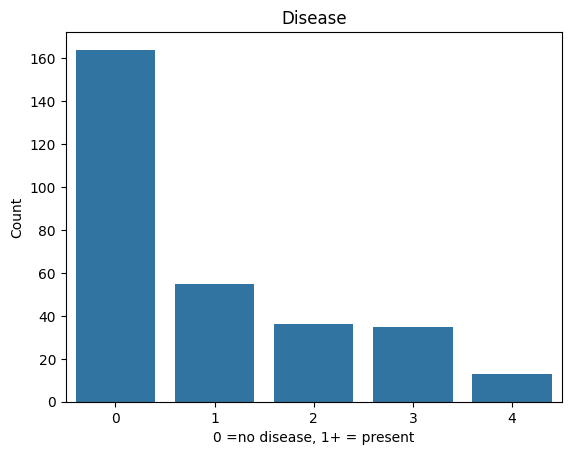

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df["target"])
plt.title("Disease")
plt.xlabel("0 =no disease, 1+ = present")
plt.ylabel("Count")
plt.show()


TEST AND TRAINING

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
X = df.drop("target",axis = 1)

In [15]:
y =df["target"]

In [16]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)


PRINT THE TEST AND TRAINING SAMPLES:


---



In [17]:
print(X_train.shape, y_train.shape)

(242, 13) (242,)


In [18]:
print(X_test.shape, y_test.shape)

(61, 13) (61,)


# Training Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

### Initialize the Random Forest


In [20]:
rfmodel = RandomForestClassifier(n_estimators=100, random_state=42)

PERFOMANCE MEASURE

In [21]:
rfmodel.fit(X_train, y_train)


y_pred = rfmodel.predict(X_test)

accuracy =accuracy_score(y_test, y_pred)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81        29
           1       0.11      0.08      0.10        12
           2       0.17      0.11      0.13         9
           3       0.17      0.14      0.15         7
           4       0.00      0.00      0.00         4

    accuracy                           0.51        61
   macro avg       0.23      0.26      0.24        61
weighted avg       0.40      0.51      0.44        61



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
print(confusion_matrix(y_test, y_pred))

[[28  0  1  0  0]
 [ 7  1  3  1  0]
 [ 4  2  1  2  0]
 [ 1  4  1  1  0]
 [ 0  2  0  2  0]]


Hyperparameter Tuning (GridSearchCV)

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [26]:
rf = RandomForestClassifier(random_state =42)

In [27]:
gs = GridSearchCV(rf, param_grid, cv = 5, scoring='accuracy', n_jobs= -1)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [28]:
print("Best Parameters:", gs.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [29]:
best= gs.best_estimator_
y_pred_best = best.predict(X_test)

In [30]:
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Improved Model Accuracy: {accuracy_best:.2f}")


Improved Model Accuracy: 0.54


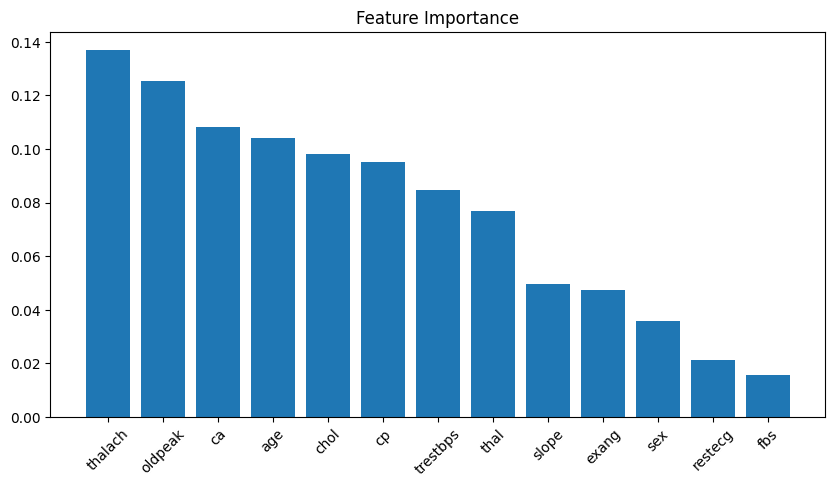

In [31]:
import matplotlib.pyplot as plt
import numpy as np

importances = best.feature_importances_
feature_names = X.columns

# Sort and visualize
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=45)
plt.show()


In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


Saving the Model
import joblib
joblib.dump(grid.best_estimator_, 'heart_disease_model.pkl')


Saves trained model to a file

Can be reused without retraining

In [33]:
import joblib
joblib.dump(best, 'heart_disease_model.pkl')
print("Model saved successfully!")

Model saved successfully!


In [34]:

loaded_model = joblib.load('heart_disease_model.pkl')

sample_data = [[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]
prediction = loaded_model.predict(sample_data)

print("Prediction:", "Heart Disease" if prediction[0] == 1 else "No Heart Disease")


Prediction: No Heart Disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [41]:
#@title ❤️ Heart Disease Prediction UI (Complete)
age = 45 #@param {type:"number"}
sex = 1 #@param {type:"number"}        # 0 = Female, 1 = Male
cp = 2 #@param {type:"number"}         # Chest pain type (0–3)
trestbps = 120 #@param {type:"number"}
chol = 230 #@param {type:"number"}
fbs = 0 #@param {type:"number"}        # Fasting blood sugar
restecg = 1 #@param {type:"number"}
thalach = 150 #@param {type:"number"}
exang = 0 #@param {type:"number"}
oldpeak = 1.0 #@param {type:"number"}
slope = 2 #@param {type:"number"}
ca = 0 #@param {type:"number"}
thal = 2 #@param {type:"number"}

import pandas as pd

input_df = pd.DataFrame([{
    "age": age,
    "sex": sex,
    "cp": cp,
    "trestbps": trestbps,
    "chol": chol,
    "fbs": fbs,
    "restecg": restecg,
    "thalach": thalach,
    "exang": exang,
    "oldpeak": oldpeak,
    "slope": slope,
    "ca": ca,
    "thal": thal
}])

prediction = rfmodel.predict(input_df)

if prediction[0] == 1:
    print("❌ Heart Disease Detected")
else:
    print("✅ No Heart Disease Detected")



✅ No Heart Disease Detected
